(60000, 28, 28)
(10000, 28, 28)
60000
[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_46 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_47 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_48 (Dense)             (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 70s 1ms/step - loss: 0.6015 - acc: 0.8155 - val_loss: 0.2888 

C:\Users\Mel_Kirabo\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.210154). Check your callbacks.
  % delta_t_median)
C:\Users\Mel_Kirabo\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106577). Check your callbacks.
  % delta_t_median)


54000/54000 [==============================] - 7s 125us/step - loss: 0.3484 - acc: 0.9001 - val_loss: 0.2647 - val_acc: 0.9215
Epoch 3/10
54000/54000 [==============================] - 2s 40us/step - loss: 0.3060 - acc: 0.9111 - val_loss: 0.2410 - val_acc: 0.9310
Epoch 4/10
54000/54000 [==============================] - 2s 41us/step - loss: 0.2869 - acc: 0.9166 - val_loss: 0.2338 - val_acc: 0.9323
Epoch 5/10
54000/54000 [==============================] - 2s 39us/step - loss: 0.2746 - acc: 0.9197 - val_loss: 0.2139 - val_acc: 0.9345
Epoch 6/10
54000/54000 [==============================] - 2s 40us/step - loss: 0.2657 - acc: 0.9218 - val_loss: 0.2255 - val_acc: 0.9325
Epoch 7/10
54000/54000 [==============================] - 2s 42us/step - loss: 0.2548 - acc: 0.9244 - val_loss: 0.2403 - val_acc: 0.9263
Epoch 8/10
54000/54000 [==============================] - 2s 40us/step - loss: 0.2500 - acc: 0.9263 - val_loss: 0.2516 - val_acc: 0.9202
Epoch 9/10
54000/54000 [===========================

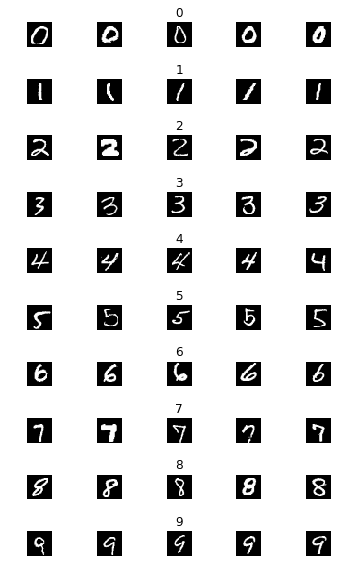

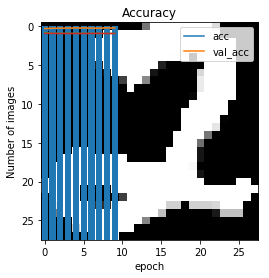

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
np.random.seed(0)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
num_of_samples = []
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255 
X_test = X_test/255
 
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
 
model = create_model()
print(model.summary())
 
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)
 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
 
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])
 
import requests
from PIL import Image
 
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = img/255
img = img.reshape(1, 784)
 
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))